In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../practical/telecom_churn.csv')

In [3]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


In [5]:
df['International plan']=df['International plan'].map({'Yes':1,'No':0})
df['Voice mail plan']=df['Voice mail plan'].map({'Yes':1,'No':0})

In [6]:
df['Churn']=df['Churn'].astype('int')

In [7]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [8]:
states=df.pop('State')

In [9]:
X,y=df.drop('Churn',axis=1),df['Churn']
X.shape, y.shape

((3333, 18), (3333,))

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_holdout, y_train, y_holdout= train_test_split(X,y,test_size=.3, random_state=17)

In [12]:
X_train.shape, X_holdout.shape

((2333, 18), (1000, 18))

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
tree=DecisionTreeClassifier(random_state=17)

In [15]:
tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [16]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

**Cross validation**

In [37]:
from  sklearn.model_selection import cross_val_score, StratifiedKFold

In [49]:
from tqdm import tqdm_notebook

In [38]:
skf=StratifiedKFold(n_splits=5,shuffle=True, random_state=17)

In [63]:
cv_accuracies_by_depth, ho_accuracies_by_depth=[], []
max_depth_values= np.arange(2,11)

#for each value of max depth
for curr_max_depth in tqdm_notebook(max_depth_values):
    tree=DecisionTreeClassifier(random_state=17, max_depth=curr_max_depth)
    
    #perform cross-validation
    val_scores=cross_val_score(estimator=tree, X=X_train, y=y_train, cv=skf)
    
    cv_accuracies_by_depth.append(val_scores.mean())
    #assess the model with the holdout set
    tree.fit(X_train,y_train)
    
    cuur_ho_pred= tree.predict(X_holdout)
    ho_accuracies_by_depth.append(accuracy_score(y_holdout, cuur_ho_pred))

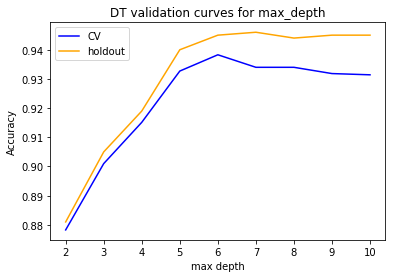

In [72]:
plt.plot(max_depth_values, cv_accuracies_by_depth, label='CV', c='blue')
plt.plot(max_depth_values, ho_accuracies_by_depth, label='holdout', c='orange')
plt.legend();
plt.xlabel('max depth')
plt.ylabel('Accuracy')
plt.title('DT validation curves for max_depth');

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
pred_holdout= tree.predict(X_holdout)

In [19]:
pred_holdout.shape, y_holdout.shape

((1000,), (1000,))

In [20]:
accuracy_score(y_holdout, pred_holdout)

0.921

In [21]:
import numpy as np

In [22]:
y.value_counts(normalize=True)

0    0.855086
1    0.144914
Name: Churn, dtype: float64

In [23]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [24]:
params={'max_depth':np.arange(2,11),'min_samples_leaf':np.arange(1,11)}

In [25]:
skf=StratifiedKFold(n_splits=5,shuffle=True, random_state=17)

In [26]:
best_tree=GridSearchCV(estimator=tree, param_grid=params, cv=skf, n_jobs=-1, verbose=1)

In [27]:
best_tree.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Done  84 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:    8.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]), 'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [28]:
best_tree.best_params_

{'max_depth': 6, 'min_samples_leaf': 2}

In [29]:
best_tree.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

**Cross-validation assessment of model qulaity**

In [30]:
best_tree.best_score_

0.9417059579939991

In [32]:
pred_holdout_better=best_tree.predict(X_holdout)

In [33]:
accuracy_score(y_holdout, pred_holdout_better)

0.947

In [103]:
export_graphviz(decision_tree=best_tree.best_estimator_, 
                out_file='tree.dot', filled=True, 
                feature_names=df.drop('Churn', axis=1).columns)

In [110]:
tree = DecisionTreeClassifier(random_state=17, max_depth=3).fit(X_train,y_train)

In [111]:
export_graphviz(decision_tree=tree, 
                out_file='tree_depth3.dot', filled=True, 
                feature_names=df.drop('Churn', axis=1).columns)

In [117]:
!cat 'tree_depth3.dor'

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
"""from io import StringIO
import pydotplus
from ipywidgets import Image
dot_data=StringIO()
export_graphviz(tree,feature_names=cancer.feature_names, 
                out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Iamge(value=graph.create_png())"""